# TensorFlow Neural Network for MNIST
In this notebook, we will build a neural network to classify handwritten digits from the MNIST dataset using TensorFlow.
We'll explore each step in creating, training, and evaluating the model.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Loading and Exploring the Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


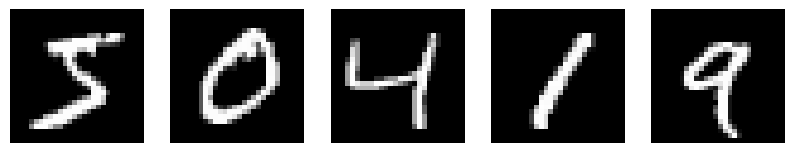

In [2]:
# Load the MNIST dataset from TensorFlow's datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print dataset shapes
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

# Display a few samples
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

## Data Preprocessing

In [3]:
# Normalize pixel values (0-255) to (0-1) for faster and more efficient training
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels for multi-class classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Building the Neural Network Model

In [4]:
# Define a Sequential model with Dense layers
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),          # Flatten 28x28 images into 784-length vectors
    layers.Dense(128, activation='relu'),          # Hidden layer with ReLU activation
    layers.Dense(64, activation='relu'),           # Another hidden layer
    layers.Dense(10, activation='softmax')         # Output layer with 10 units for classification
])

# Display model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [5]:
# Compile the model with an optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',                     # Adam optimizer for adaptive learning rate
              loss='categorical_crossentropy',      # Cross-entropy for multi-class classification
              metrics=['accuracy'])                 # Track accuracy during training

## Training the Model

In [6]:
# Train the model and store training history for visualization
history = model.fit(x_train, y_train, epochs=10, 
                    validation_split=0.2,           # Use 20% of the training data for validation
                    batch_size=32)                  # Process data in batches of 32

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8692 - loss: 0.4505 - val_accuracy: 0.9582 - val_loss: 0.1431
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9651 - loss: 0.1162 - val_accuracy: 0.9649 - val_loss: 0.1128
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9773 - loss: 0.0744 - val_accuracy: 0.9670 - val_loss: 0.1077
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9828 - loss: 0.0550 - val_accuracy: 0.9692 - val_loss: 0.1039
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9874 - loss: 0.0398 - val_accuracy: 0.9668 - val_loss: 0.1177
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9905 - loss: 0.0310 - val_accuracy: 0.9730 - val_loss: 0.0995
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9718 - val_loss: 0.1088
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9925 - loss: 0.0230 - 

## Evaluating the Model

In [7]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Test Accuracy: 0.9767
Test Loss: 0.1023


## Visualizing Results

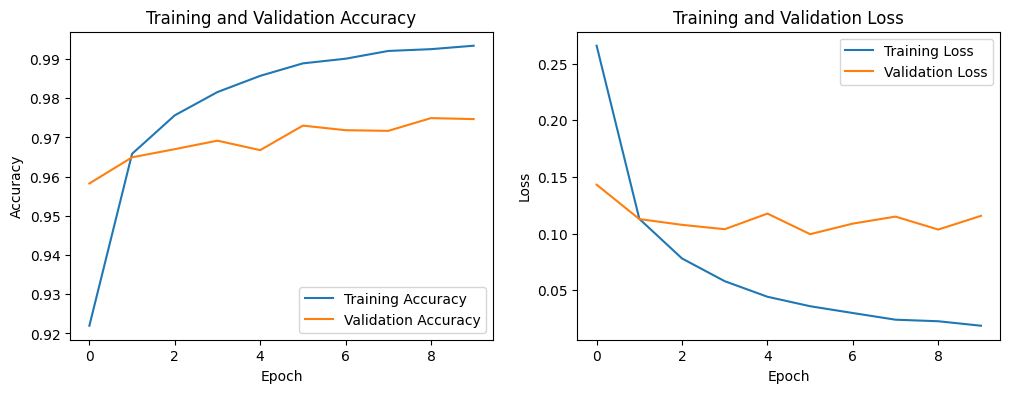

In [8]:
# Plotting training and validation accuracy over epochs
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

## Predicting and Visualizing Sample Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


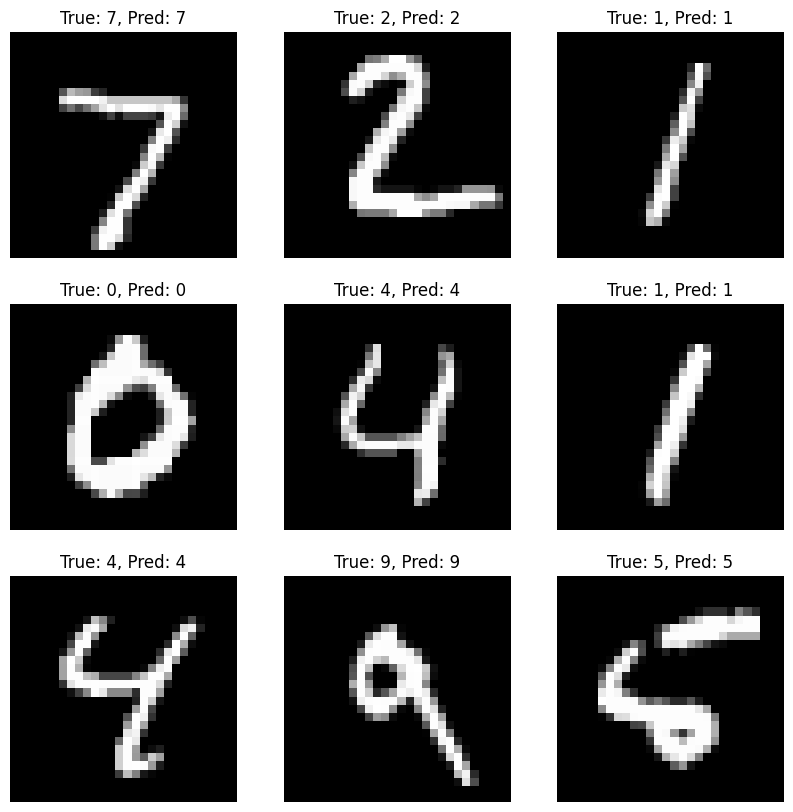

In [9]:
# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Visualize a few predictions along with true labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'True: {true_labels[i]}, Pred: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

## What's next?

Try experimenting with parameters, improve model accuracy, increase the number of epochs, apply early stopping

**Happy training! 🎉**